# Traffic Situation Prediction

In [10]:
#importing dependeis

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import (
    OneHotEncoder,
    MinMaxScaler,
    LabelEncoder, 
)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    roc_curve,
    roc_auc_score,
)

# Modeling
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.linear_model import (
    LinearRegression,
    Ridge,
    Lasso
)
from sklearn.model_selection import (
    train_test_split,  # used to split the data into training and testing
    RandomizedSearchCV,  # used for tuning the models parameters
    cross_val_score,
)

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")


In [11]:
df= pd.read_csv(r"C:\Users\NAIB\Downloads\archive (22)\Traffic.csv")
df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal


In [12]:
df. tail()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
2971,10:45:00 PM,9,Thursday,16,3,1,36,56,normal
2972,11:00:00 PM,9,Thursday,11,0,1,30,42,normal
2973,11:15:00 PM,9,Thursday,15,4,1,25,45,normal
2974,11:30:00 PM,9,Thursday,16,5,0,27,48,normal
2975,11:45:00 PM,9,Thursday,14,3,1,15,33,normal


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               2976 non-null   object
 1   Date               2976 non-null   int64 
 2   Day of the week    2976 non-null   object
 3   CarCount           2976 non-null   int64 
 4   BikeCount          2976 non-null   int64 
 5   BusCount           2976 non-null   int64 
 6   TruckCount         2976 non-null   int64 
 7   Total              2976 non-null   int64 
 8   Traffic Situation  2976 non-null   object
dtypes: int64(6), object(3)
memory usage: 209.4+ KB


In [14]:

df.shape

(2976, 9)

In [15]:
df.describe()

,Date,CarCount,BikeCount,BusCount,TruckCount,Total
count,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000
mean,16.000000,68.696573,14.917339,15.279570,15.324933,114.218414
std,8.945775,45.850693,12.847518,14.341986,10.603833,60.190627
min,1.000000,6.000000,0.000000,0.000000,0.000000,21.000000
25%,8.000000,19.000000,5.000000,1.000000,6.000000,55.000000
50%,16.000000,64.000000,12.000000,12.000000,14.000000,109.000000
75%,24.000000,107.000000,22.000000,25.000000,23.000000,164.000000
max,31.000000,180.000000,70.000000,50.000000,40.000000,279.000000


In [16]:
df['midday'] = ''  

for i in range(len(df['Time'])):
    
    if df['Time'][i][-2:] == 'AM':
        df.loc[i, 'midday'] = 'AM'
        
    elif df['Time'][i][-2:] == 'PM':
       df.loc[i, 'midday'] = 'PM'
        
# removing 'AM' or 'PM' form Time column        
df['Time'] = df['Time'].str[:-2]

In [17]:
df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,midday
0,12:00:00,10,Tuesday,31,0,4,4,39,low,AM
1,12:15:00,10,Tuesday,49,0,3,3,55,low,AM
2,12:30:00,10,Tuesday,46,0,3,6,55,low,AM
3,12:45:00,10,Tuesday,51,0,2,5,58,low,AM
4,1:00:00,10,Tuesday,57,6,15,16,94,normal,AM


<Figure size 432x432 with 0 Axes>

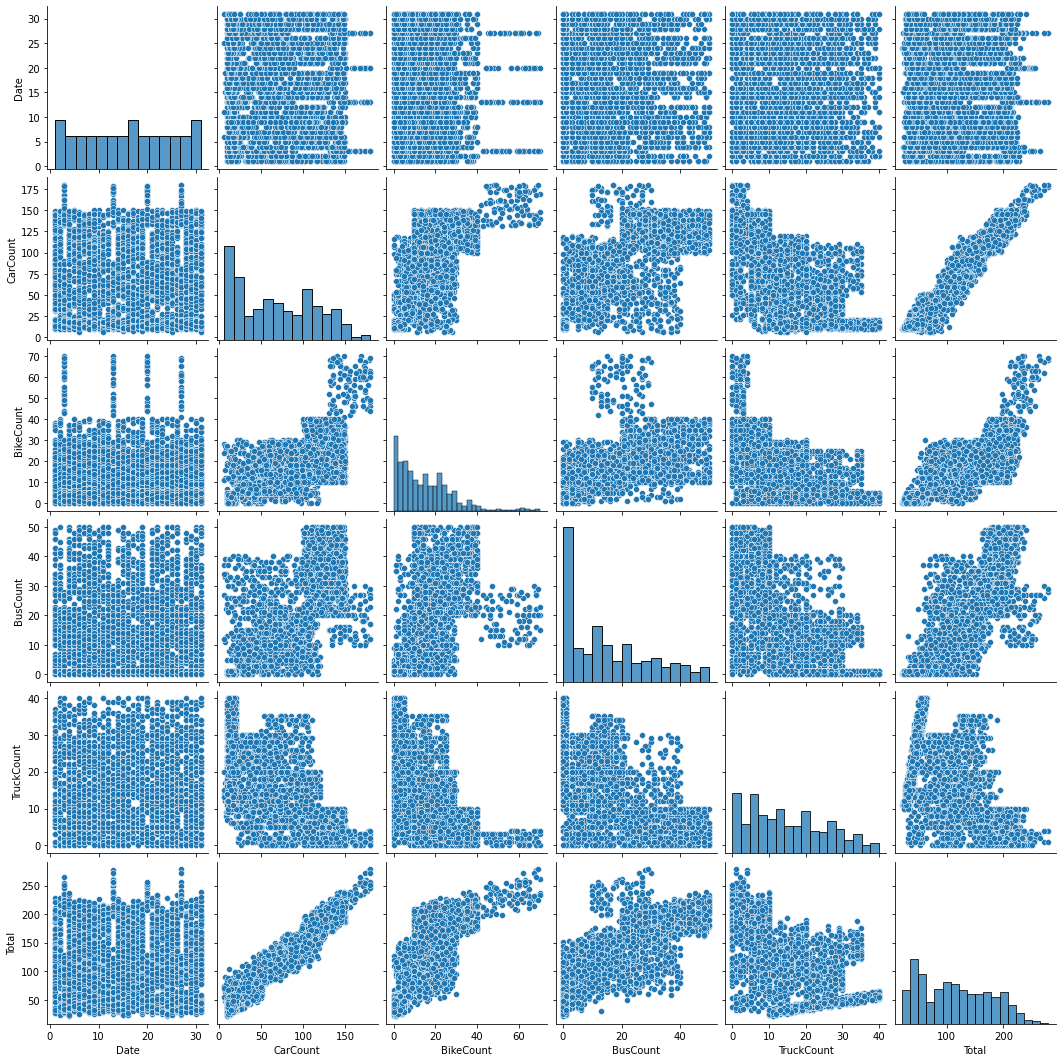

In [24]:
plt.figure(figsize=(6,6))
col=['Time','Date','CarCount','BikeCount','BusCount','TruckCount','Total']
sns.pairplot(df[col])
plt.show()

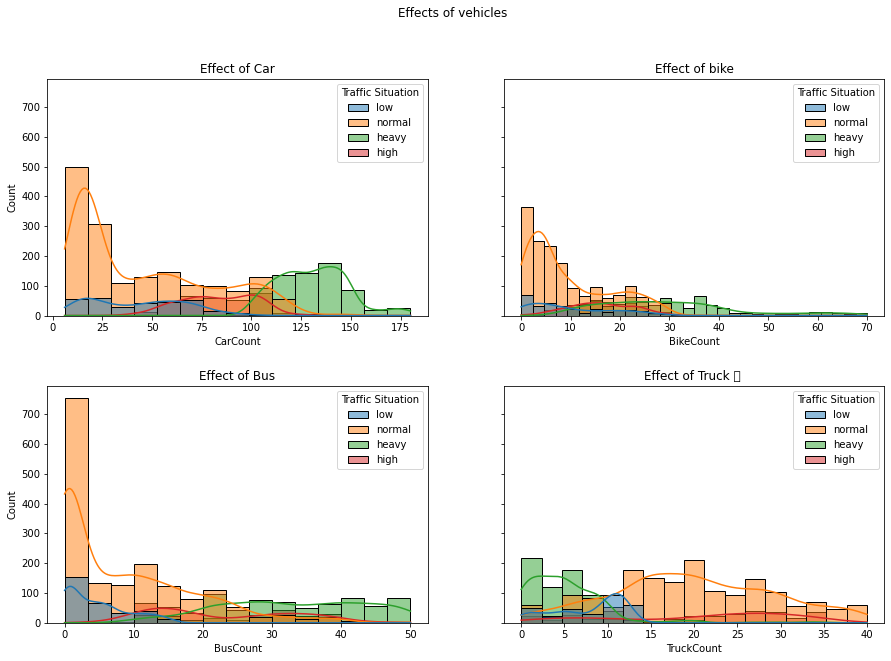

In [25]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharey=True)
fig.suptitle('Effects of vehicles')
# ------------- First-plot(1,1)
sns.histplot(df,x='CarCount',hue='Traffic Situation',kde=True,ax=axes[0,0])
axes[0,0].set_title('Effect of Car')
# ------------- Second-plot(1,2)
sns.histplot(df,x='BikeCount',hue='Traffic Situation',kde=True,ax=axes[0,1])
axes[0,1].set_title('Effect of bike')
# ------------- Third-plot(2,1)
sns.histplot(df,x='BusCount',hue='Traffic Situation',kde=True,ax=axes[1,0])
axes[1,0].set_title('Effect of Bus')
# ------------ Forth-plot(2,2)
sns.histplot(df,x='TruckCount',hue='Traffic Situation',kde=True,ax=axes[1,1])
axes[1,1].set_title('Effect of Truck 🚚 ')
plt.subplots_adjust(hspace=0.3)
plt.show()

In [26]:
hours = ['12:00','','','','1:00','','','','2:00','','','','3:00','','','','4:00','','','','5:00','','','','6:00','','','','7:00','','','','8:00','','','','9:00','','','','10:00','','','','11:00']

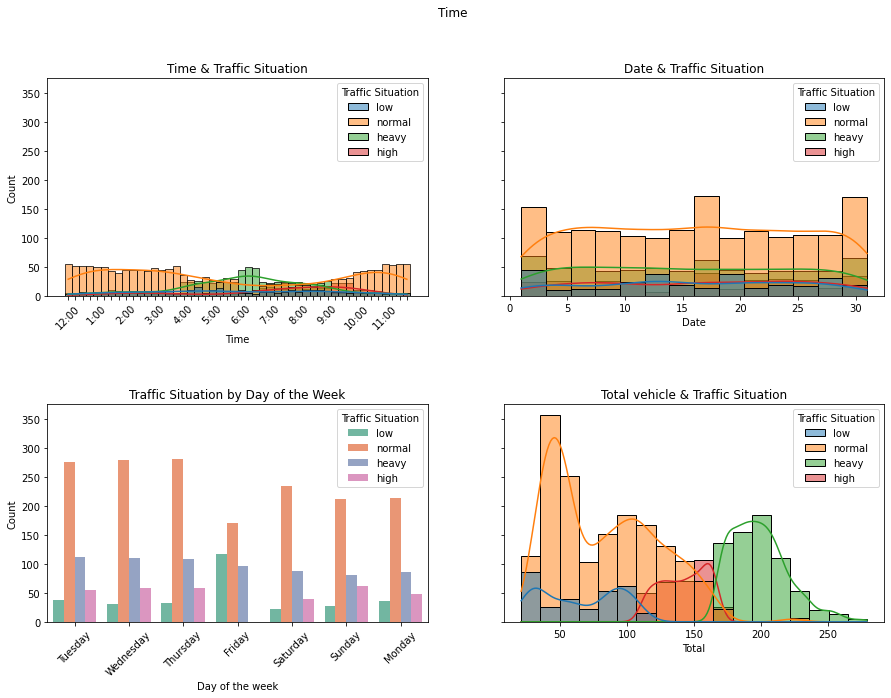

In [29]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharey=True)
fig.suptitle('Time')

sns.histplot(df, x='Time', hue='Traffic Situation', kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Time & Traffic Situation')
axes[0, 0].set_xticklabels(hours, rotation=45)

sns.histplot(df, x='Date', hue='Traffic Situation', kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Date & Traffic Situation')

sns.countplot(data=df, x="Day of the week", hue="Traffic Situation", palette="Set2", ax=axes[1, 0])
axes[1, 0].set_xlabel("Day of the week")
axes[1, 0].set_ylabel("Count")
axes[1, 0].set_title("Traffic Situation by Day of the Week")
# Set the tick positions and labels
tick_positions = range(len(df['Day of the week'].unique()))
tick_labels = df['Day of the week'].unique()

# Set the tick positions and labels on the x-axis
axes[1, 0].set_xticks(tick_positions)
axes[1, 0].set_xticklabels(tick_labels, rotation=45)
# axes[1, 0].set_xticklabels(traffic_df['Day of the week'], rotation=45)

sns.histplot(df, x='Total', hue='Traffic Situation', kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Total vehicle & Traffic Situation')

plt.subplots_adjust(hspace=0.5)
plt.show()

In [33]:
# Assuming 'Time' is the name of the column in your DataFrame
df['Time'] = pd.to_datetime(df['Time']).dt.hour * 3600 + \
                     pd.to_datetime(df['Time']).dt.minute * 60 + \
                     pd.to_datetime(df['Time']).dt.second
df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,midday
0,43200,10,Tuesday,31,0,4,4,39,low,AM
1,44100,10,Tuesday,49,0,3,3,55,low,AM
2,45000,10,Tuesday,46,0,3,6,55,low,AM
3,45900,10,Tuesday,51,0,2,5,58,low,AM
4,3600,10,Tuesday,57,6,15,16,94,normal,AM


In [34]:
df['Traffic Situation'].value_counts()


normal    1669
heavy      682
high       321
low        304
Name: Traffic Situation, dtype: int64

In [35]:
# Separate the features and target variable
X = df.drop(['Traffic Situation'], axis=1)
Y = df['Traffic Situation']

In [42]:
# Normalize the numeric features using MinMaxScaler
numeric_columns = ['Time', 'Date', 'CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total']
scaler = MinMaxScaler()
X[numeric_columns] = scaler.fit_transform(X[numeric_columns])

In [44]:
# Encode the categorical feature 'midday' using LabelEncoder
le = LabelEncoder()
X['midday'] = le.fit_transform(X['midday'])
X['Day of the week'] = le.fit_transform(X['Day of the week'])

# Encode the target variable 'Traffic Situation' using LabelEncoder
le_target = LabelEncoder()
Y = le_target.fit_transform(Y)

In [45]:
# Concatenate the features and target variable
normalized_encoded_data = pd.concat([X, pd.Series(Y, name='Traffic Situation')], axis=1)

In [47]:
df=normalized_encoded_data
df

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,midday,Traffic Situation
0,0.936170,0.300000,5,0.143678,0.000000,0.08,0.100,0.069767,0,2
1,0.957447,0.300000,5,0.247126,0.000000,0.06,0.075,0.131783,0,2
2,0.978723,0.300000,5,0.229885,0.000000,0.06,0.150,0.131783,0,2
3,1.000000,0.300000,5,0.258621,0.000000,0.04,0.125,0.143411,0,2
4,0.000000,0.300000,5,0.293103,0.085714,0.30,0.400,0.282946,0,3
...,...,...,...,...,...,...,...,...,...,...
2971,0.829787,0.266667,4,0.057471,0.042857,0.02,0.900,0.135659,1,3
2972,0.851064,0.266667,4,0.028736,0.000000,0.02,0.750,0.081395,1,3
2973,0.872340,0.266667,4,0.051724,0.057143,0.02,0.625,0.093023,1,3
2974,0.893617,0.266667,4,0.057471,0.071429,0.00,0.675,0.104651,1,3


In [48]:
X = df.drop('Traffic Situation', axis=1)
y = df['Traffic Situation']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2678, 9), (298, 9), (2678,), (298,))

In [49]:
X_train

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,midday
2620,0.510638,0.166667,1,0.816092,0.142857,0.56,0.050,0.647287,0
2353,0.957447,0.066667,0,0.735632,0.671429,0.44,0.075,0.717054,1
1309,0.191489,0.733333,1,0.126437,0.214286,0.54,0.300,0.236434,1
1190,0.723404,0.700000,2,0.160920,0.071429,0.54,0.550,0.259690,0
2167,0.063830,0.000000,6,0.586207,0.242857,0.66,0.175,0.558140,1
...,...,...,...,...,...,...,...,...,...
1638,0.042553,0.866667,0,0.080460,0.028571,0.00,0.425,0.069767,0
1095,0.744681,0.666667,3,0.528736,0.300000,0.20,0.125,0.437984,0
1130,0.468085,0.666667,3,0.632184,0.314286,0.46,0.175,0.569767,1
1294,0.893617,0.733333,1,0.195402,0.128571,0.30,0.700,0.275194,0


In [50]:
y_train

2620    0
2353    0
1309    3
1190    3
2167    1
       ..
1638    3
1095    3
1130    0
1294    3
860     3
Name: Traffic Situation, Length: 2678, dtype: int32

In [51]:
init_models = {
    'support vector linear' : SVR(kernel='linear'),
    'support vector kernel' : SVR(kernel= 'rbf'),
    'XGBOOST':XGBRegressor(),
    'Decision Tree' : DecisionTreeRegressor(),
    'Random Forest' : RandomForestRegressor(),
    'LGBM' : LGBMRegressor()
}

In [52]:
R2 = []
models_names = []
for i,(key,model) in enumerate(init_models.items()):
    model.fit(X_train,y_train)
    models_names.append(key)
    R2.append(np.mean(cross_val_score(model,X_train,y_train,cv=5)))
models_scores = pd.DataFrame({'model name':models_names,'R2 score':R2})
models_scores.head(7)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000811 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 2678, number of used features: 9
[LightGBM] [Info] Start training from score 2.000747
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000036 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 612
[LightGBM] [Info] Number of data points in the train set: 2143, number of used features: 9
[LightGBM] [Info] Start training from score 2.001400
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

,model name,R2 score
0,support vector linear,0.594565
1,support vector kernel,0.679043
2,XGBOOST,0.999997
3,Decision Tree,1.000000
4,Random Forest,0.997275
5,LGBM,0.995323


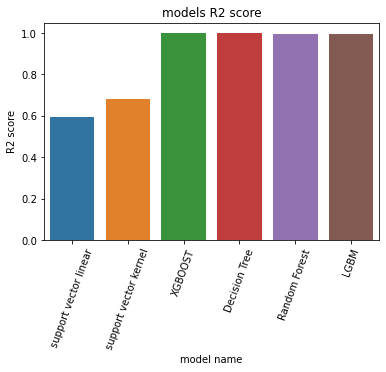

In [53]:
fig, ax = plt.subplots()
ax.set_xticklabels(ax.get_xticklabels(), rotation=70)
ax.set_title("models R2 score")
sns.barplot(data=models_scores, x='model name', y="R2 score")
plt.show()

In [54]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [55]:
y_pred = model.predict(X_test)

In [56]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision with 'weighted' average setting
precision = precision_score(y_test, y_pred, average='weighted')

# Calculate recall with 'weighted' average setting
recall = recall_score(y_test, y_pred, average='weighted')

# Calculate F1 score with 'weighted' average setting
f1 = f1_score(y_test, y_pred, average='weighted')

In [57]:
print(f'Accuracy: {accuracy}')
print(f'precision: {precision}') 
print(f'recall: {recall}') 
print(f'f1_score: {f1}') 

Accuracy: 1.0
precision: 1.0
recall: 1.0
f1_score: 1.0


In [58]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 72,   0,   0,   0],
       [  0,  33,   0,   0],
       [  0,   0,  34,   0],
       [  0,   0,   0, 159]], dtype=int64)

In [59]:
def plot_confusion_matrix(confusion_matrix, classes):

    plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = confusion_matrix.max() / 2.
    for i in range(confusion_matrix.shape[0]):
        for j in range(confusion_matrix.shape[1]):
            plt.text(j, i, format(confusion_matrix[i, j], fmt),
                     ha="center", va="center",
                     color="white" if confusion_matrix[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

    # Show the plot
    plt.show()

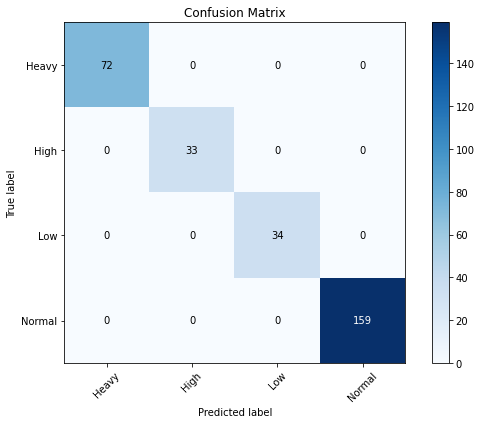

In [60]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
plot_confusion_matrix(cm, classes=['Heavy', 'High', 'Low', 'Normal'])
plt.show()

After extensive evaluation of various machine learning models, including Support Vector Machine (SVM), Random Forest (RF), Decision Tree (DT), and XGBoost, it has been observed that the Decision Tree model outperformed others in predicting traffic situations. This conclusion is drawn from a comprehensive analysis that involved training, testing, and cross-validating each model.

The Decision Tree model demonstrated superior performance, as evidenced by its accuracy in predicting traffic conditions. This efficacy was further validated through the visualization of a confusion matrix, providing insights into the model's ability to correctly classify instances across different traffic categories.

Upon applying the trained model to the test dataset, it consistently exhibited robust predictive capabilities. The model's accuracy in forecasting real-world traffic situations signifies its reliability for practical deployment.

In summary, the Decision Tree model emerges as the preferred choice for traffic situation prediction in this study. Its effectiveness, coupled with a clear interpretation provided by the confusion matrix, makes it a valuable tool for enhancing traffic management and planning strategies. The success of the Decision Tree model underscores the importance of selecting an appropriate algorithm tailored to the characteristics of the dataset, paving the way for more accurate and reliable traffic predictions.